<a href="https://colab.research.google.com/github/jwebert1346/320FinalProject/blob/main/320_Project_Checkpoint_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# a) imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
# b) parse and c) organize
df = pd.read_csv('Big_Black_Money_Dataset.csv')
df['Amount (USD)'] = df['Amount (USD)'].astype(float)
df['Money Laundering Risk Score'] = df['Money Laundering Risk Score'].astype(int)
df['Shell Companies Involved'] = df['Shell Companies Involved'].astype(int)

In [ ]:
df

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX0000009996,Singapore,2.209229e+06,Offshore Transfer,2014-02-21 11:00:00,Person_6896,Real Estate,Brazil,False,Illegal,4,4,Bank_258,Luxembourg
9996,TX0000009997,UAE,4.800338e+06,Property Purchase,2014-02-21 12:00:00,Person_6348,Luxury Goods,Russia,False,Legal,10,2,Bank_449,Luxembourg
9997,TX0000009998,UK,4.891953e+05,Stocks Transfer,2014-02-21 13:00:00,Person_4171,Oil & Gas,Russia,False,Illegal,5,0,Bank_156,Cayman Islands
9998,TX0000009999,Brazil,2.233581e+06,Offshore Transfer,2014-02-21 14:00:00,Person_2799,Real Estate,Russia,True,Illegal,10,5,Bank_12,Singapore


In [ ]:
# These are our features
df.columns

Index(['Transaction ID', 'Country', 'Amount (USD)', 'Transaction Type',
       'Date of Transaction', 'Person Involved', 'Industry',
       'Destination Country', 'Reported by Authority', 'Source of Money',
       'Money Laundering Risk Score', 'Shell Companies Involved',
       'Financial Institution', 'Tax Haven Country'],
      dtype='object')

In [ ]:
# summary stats
df.describe()

,Amount (USD),Money Laundering Risk Score,Shell Companies Involved
count,1.000000e+04,10000.000000,10000.000000
mean,2.501818e+06,5.526400,4.469400
std,1.424364e+06,2.893603,2.879773
min,1.003180e+04,1.000000,0.000000
25%,1.279005e+06,3.000000,2.000000
50%,2.501310e+06,6.000000,4.000000
75%,3.722416e+06,8.000000,7.000000
max,4.999812e+06,10.000000,9.000000


In [ ]:
print("Number of NA values")
for col in df.columns:
    print(str(col) + ': ' + str(df[col].isna().sum()))

Number of NA values
Transaction ID: 0
Country: 0
Amount (USD): 0
Transaction Type: 0
Date of Transaction: 0
Person Involved: 0
Industry: 0
Destination Country: 0
Reported by Authority: 0
Source of Money: 0
Money Laundering Risk Score: 0
Shell Companies Involved: 0
Financial Institution: 0
Tax Haven Country: 0


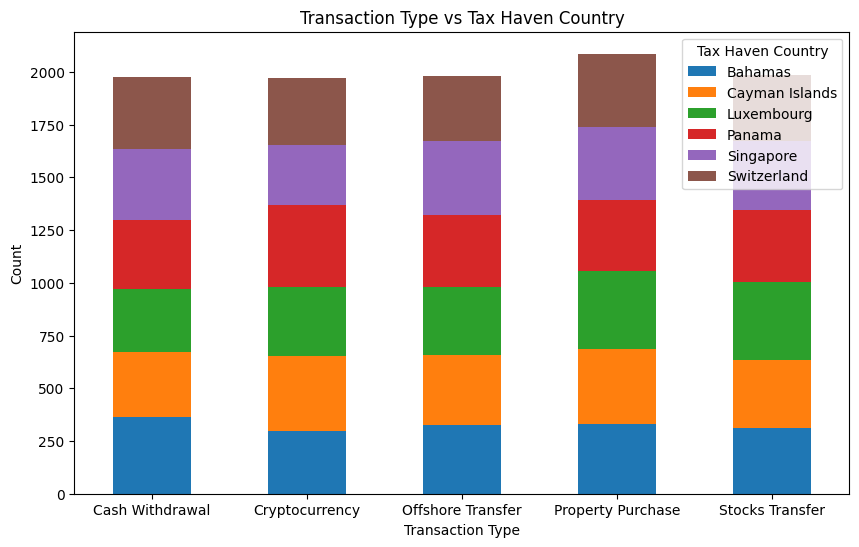

Chi-Square Statistic: 41.26891811614076
p-value: 0.0034399538602876483
Degrees of Freedom: 20


In [ ]:
# 1:
# is there a significant association between the Transaction Type and the Tax Haven Country (chi square)
#H0 = There is no sigificant association between Transaction Type and the Tax Haven Country
#H1 = There is a significant association between Transaction Type and the Tax Haven Country
# alpha = .05

# We perform a chi square test here because we are determining the association between 2 categorical variables.

contingency_table = pd.crosstab(df['Transaction Type'], df['Tax Haven Country'])

# stacked bar plot
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Transaction Type vs Tax Haven Country')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Tax Haven Country')
plt.xticks(rotation=0)
plt.show()

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of Freedom: {dof}')

Based on the results of the chi square test, as well as our alpha value of 0.05, we reject the null hypothesis and accept the alternative, that there is a significant difference between Transaction Type and Tax Haven Country (p < .05).

The Chi Squared test gave us a p-value of 0.0034, which is less than the standard alpha value of 0.05. Since our p-value was less than our alpha value, we can reject the null hypothesis and accept the alternative hypothesis. So, we can conclude that there is a significant difference between the Transaction Type and Tax Haven Country.


ANOVA for means of illegal transaction dollar amounts per country:
ANOVA F-statistic: 0.9096973107091985
ANOVA p-value: 0.5154581977587552



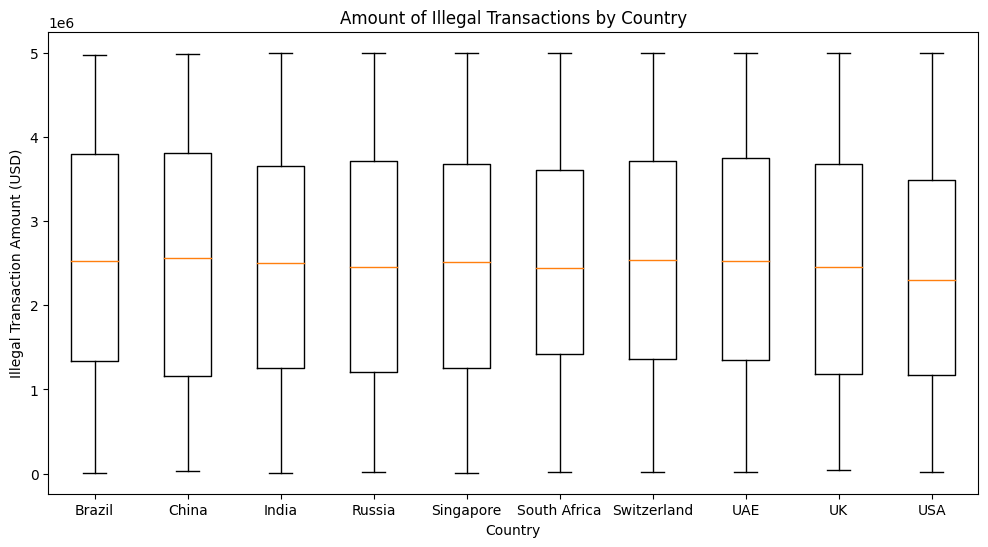

In [ ]:
## 2:
# is there a significant difference between average amount of an illegal transaction by country (ANOVA)
#H0 = There is no significant difference between average amount of an illegal transaction by country
#H1 = There is a significant difference between average amount of an illegal transaction by country
# alpha = .05

# We perform an Anova test here because we are working with 3+ categorical independent variable with continuous dependent variable

# filter for illegal transactions
illegal_transactions = df[df['Source of Money'] == 'Illegal']

# group by country and then get lists of illegal transactions
grouped_amounts = [group['Amount (USD)'].values for name, group in illegal_transactions.groupby('Country')]

# gorgeous plot - box and whisker plot by country of illegal transactions
country_names = [name for name, group in illegal_transactions.groupby('Country')]
plt.figure(figsize=(12, 6))  # Set figure size
plt.boxplot(grouped_amounts, labels=country_names)
plt.xlabel('Country')
plt.ylabel('Illegal Transaction Amount (USD)')
plt.title('Amount of Illegal Transactions by Country')

# anova
f_statistic, p_value = stats.f_oneway(*grouped_amounts)

# print
print("ANOVA for means of illegal transaction dollar amounts per country:")
print(f'ANOVA F-statistic: {f_statistic}')
print(f'ANOVA p-value: {p_value}')
print()

This ANOVA test resulted in a large p-value of 0.515, which is much larger than our alpha value of 0.05. This implies that we cannot reject the null hypothesis, so there is no significant difference between the average amounts of money spent in illegal transactions by country. Since the ANOVA test did not cause us to reject the null hypothesis, we do not to perform any post hoc tests since there is no difference to investigate between the means of the amounts of money spent illegally for each country.

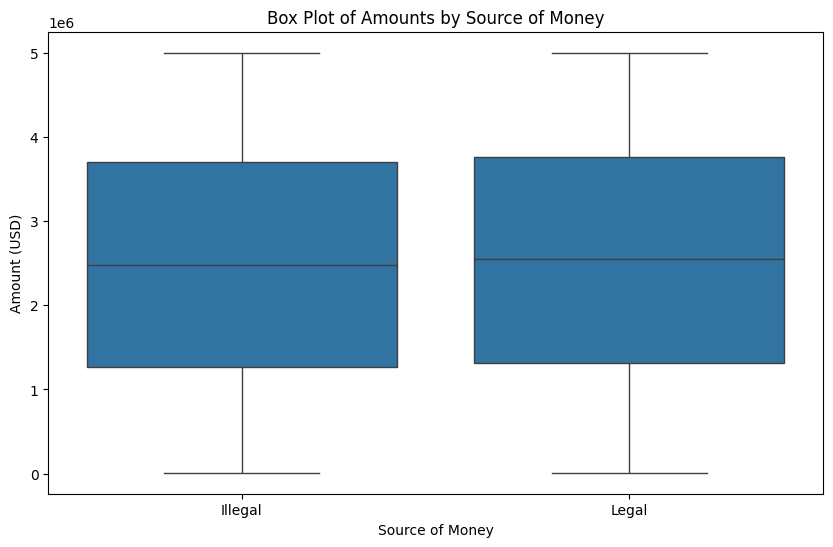

T-test for means of legal and illegal transaction dollar amounts:
T-test statistic: 1.135242775082645
T-test p-value: 0.25632230325170546


In [ ]:
# 3:
# is there a significant difference between the amount spent on a legal vs illegal transaction (t-test)
#H0 = There is no significant difference between the amount spent on a legal vs illegal transaction
#H1 = There is a significant difference between the amount spent on a legal vs illegal transaction
# alpha = .05

# We are using a t test because we want to compare the means of two groups.

# filter for legal and illegal transactions
legal_transactions = df[df['Source of Money'] == 'Legal']['Amount (USD)']
illegal_transactions = df[df['Source of Money'] == 'Illegal']['Amount (USD)']

#box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source of Money', y='Amount (USD)', data=df)
plt.title('Box Plot of Amounts by Source of Money')
plt.xlabel('Source of Money')
plt.ylabel('Amount (USD)')
plt.show()

# t test
t_statistic, p_value = stats.ttest_ind(legal_transactions, illegal_transactions, equal_var=False)

# print
print("T-test for means of legal and illegal transaction dollar amounts:")
print(f'T-test statistic: {t_statistic}')
print(f'T-test p-value: {p_value}')

This t-test returned a p-value of 0.256. This is larger than our alpha value of 0.05, so again we cannot reject our null hypothesis. So, we conclude that there is no significant difference between the amounts of money spent illegally vs legally.